### 1. Seleksi Unvariate

In [21]:
# Import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
# Import data
data = pd.read_csv("hero_data.csv")
data.head()

,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_magic_resistance,base_attack_min,base_attack_max,base_strength,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,200,1.50,75,0.9,25,27,31,22,22,12,1.3,2.8,1.8,150,0,1.45,310,0.5
1,2,200,4.25,75,0.9,25,24,28,25,20,18,2.8,2.2,1.6,150,900,1.70,290,0.6
2,3,200,1.50,75,0.9,25,37,43,23,23,23,2.4,2.4,2.4,400,900,1.70,310,0.6
3,4,200,1.50,75,0.9,25,33,39,23,24,18,2.7,3.0,1.7,150,900,1.70,285,0.5
4,5,200,1.50,75,0.9,25,19,25,16,16,16,2.0,1.6,2.9,600,900,1.70,275,0.5


In [29]:
# Memilih data yang dibutuhkan
X = data.iloc[:,0:20]
y = data.iloc[:,-1]
y= y.astype('int')

In [30]:
# menerapkan SelectKBest
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [32]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Hero','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Hero      Score
14       attack_range  93.675020
0             hero_id  19.970634
15   projectile_speed   6.171824
18          turn_rate   2.172668
10  base_intelligence   1.873031
7     base_attack_max   0.656354
6     base_attack_min   0.505929
12       agility_gain   0.157395
2   base_health_regen   0.090350
13  intelligence_gain   0.054031


### 2. Feature Importance

In [36]:
# Import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [37]:
# Import dan memilih data
data = pd.read_csv("hero_data.csv")
X = data.iloc[:,0:20]
y = data.iloc[:,-1]
y= y.astype('int')

In [38]:
# Melakukan ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[3.22075727e-02 0.00000000e+00 4.68033494e-02 0.00000000e+00
 0.00000000e+00 4.44495980e-06 2.14045482e-02 3.12571666e-02
 2.46232784e-02 2.12697820e-02 4.39428804e-02 2.75211590e-02
 4.91955431e-02 2.70255237e-02 2.17805504e-02 2.58588725e-02
 3.40452363e-02 2.30349876e-02 5.70025105e-01]


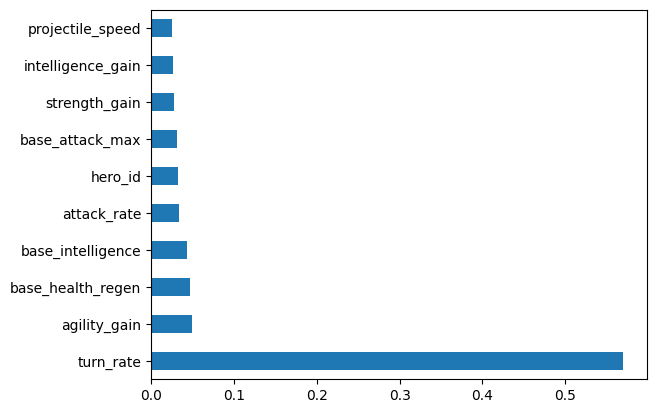

In [39]:
# Melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 3. Matriks Korelasi dengan Heatmap


In [40]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
# Import dan memilih data
data = pd.read_csv("hero_data.csv")
X = data.iloc[:,0:20]
y = data.iloc[:,-1]
y= y.astype('int')

In [42]:
# Mendapatkan korelasi dari setiap kolom dataset
corrmat = data.corr()
top_corr_features = corrmat.index

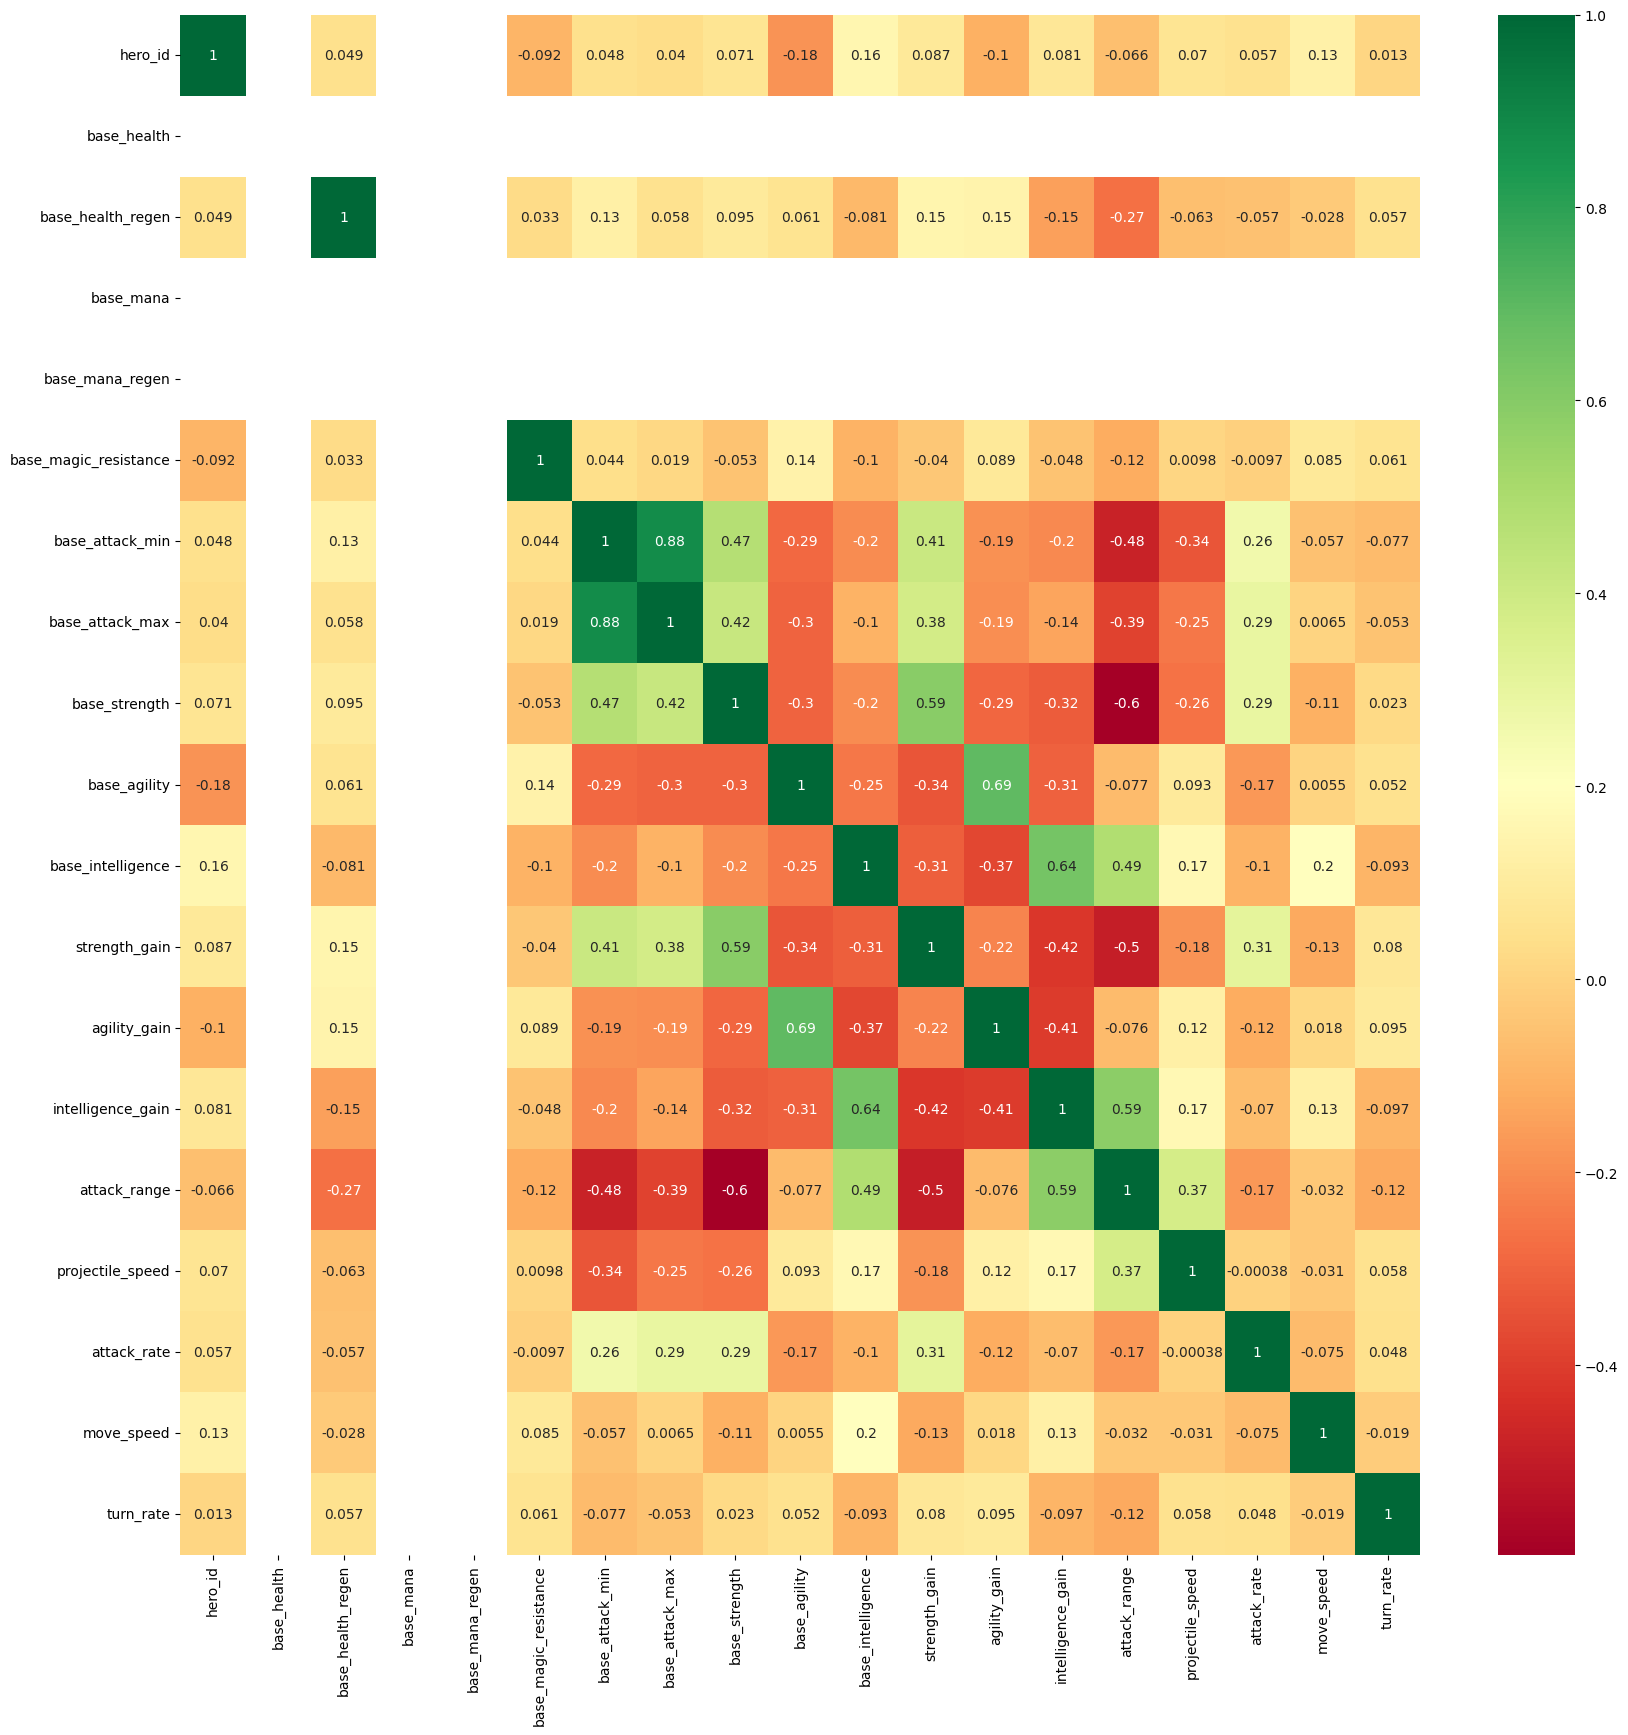

In [44]:
# Menampilkan heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")



*   base_health, base_mana, base_mana_regen tidak memiliki korelasi dengan fitur lain.
*   hero_id, base_magic_resistance, move_speed, dan turn_rate memiliki korelasi lemah dengan fitur lain (semuanya hampir mendekati 0)
*   terdapat korelasi kuat antara fitur base dan fitur gainnya
*   attack_range memiliki korelasi terbalik dengan strength
*   attack_rate memiliki korelasi dengan base_attack




